In [1]:
import sys
sys.path.append(r"../src/")
from party.histogram import *
from scipy.stats import norm

In [2]:
h1 = Hist1D(40, -5., 5.)
h1.set_error_type(BinErrorType.Normal)

h2 = Hist1D(40, -5., 5.)
h2.set_error_type(BinErrorType.Poisson)

In [3]:
h1.fill_array(norm.rvs(loc=-1, scale=1, size=10000))
h2.fill_array(norm.rvs(loc=+1, scale=2, size=2500))
h3 = h1 + h2
h4 = h1 + 5 * h2

In [4]:
import pickle
with open("/tmp/test.pkl", "wb") as f:
    pickle.dump((h1, h2, h3, h4), f)

In [5]:
h1 = h2 = h3 = h4 = None
with open("/tmp/test.pkl", "rb") as f:
    h1, h2, h3, h4 = pickle.load(f)

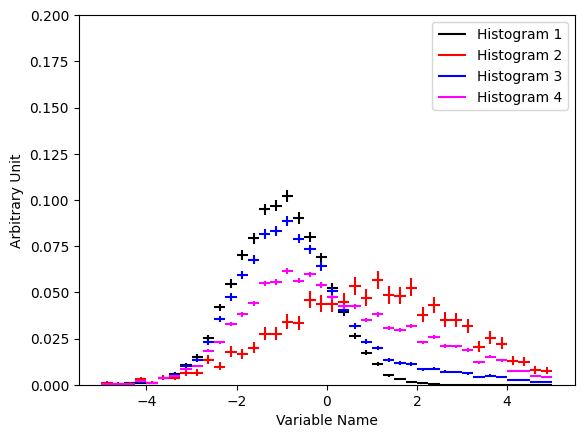

In [6]:
plt.figure()
h1.plot(label="Histogram 1", color="black", density=True)
h2.plot(label="Histogram 2", color="red", density=True)
h3.plot(label="Histogram 3", color="blue", density=True)
h4.plot(label="Histogram 4", color="magenta", density=True)
plt.ylim([0, 0.2])
plt.xlabel("Variable Name")
plt.ylabel("Arbitrary Unit")
plt.legend()
plt.show()